## Install dependencies

In [1]:
import torch
import torchvision
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
! git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16517, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 16517 (delta 47), reused 50 (delta 16), pack-reused 16402
Receiving objects: 100% (16517/16517), 15.17 MiB | 8.42 MiB/s, done.
Resolving deltas: 100% (11304/11304), done.


## Installing model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/user/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-20 Python-3.10.6 torch-2.2.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Make detections with a dog image

In [5]:
image = 'raw_data/teacup-poodle.jpeg'

In [6]:
results = model(image)
results.print()

image 1/1: 512x768 1 dog, 1 teddy bear
Speed: 72.2ms pre-process, 141.7ms inference, 15.7ms NMS per image at shape (1, 3, 448, 640)


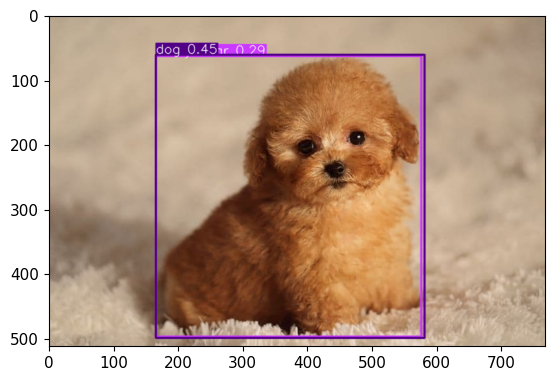

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
results.render()

[array([[[184, 166, 142],
         [184, 166, 142],
         [184, 166, 142],
         ...,
         [157, 139, 117],
         [157, 139, 117],
         [157, 139, 117]],
 
        [[184, 166, 142],
         [184, 166, 142],
         [184, 166, 142],
         ...,
         [157, 139, 117],
         [157, 139, 117],
         [157, 139, 117]],
 
        [[184, 166, 142],
         [184, 166, 142],
         [184, 166, 142],
         ...,
         [157, 139, 117],
         [157, 139, 117],
         [157, 139, 117]],
 
        ...,
 
        [[180, 162, 140],
         [179, 161, 139],
         [180, 162, 140],
         ...,
         [189, 169, 145],
         [188, 168, 144],
         [187, 167, 143]],
 
        [[181, 163, 141],
         [178, 160, 138],
         [176, 158, 136],
         ...,
         [190, 170, 146],
         [189, 169, 145],
         [189, 169, 145]],
 
        [[186, 168, 146],
         [181, 163, 141],
         [177, 159, 137],
         ...,
         [193, 173, 149],
  

## Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [9]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('raw_data','Dogs_run')
#labels = ['Dogs_eat','Dogs_poop','Dogs_run','Dogs_sleep','Dogs_trash']
number_imgs = 10

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # Webcam feed
        ret, frame = cap.read()

        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

        # Writes out image to file
        cv2.imwrite(imgname, frame)

        # Render to the screen
        cv2.imshow('Image Collection', frame)

        # 2 second delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [1]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 1.73 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [10]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [13]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.6 torch-2.2.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, a

In [19]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/user/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-3-22 Python-3.10.6 torch-2.2.1 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [20]:
img = 'raw_data/Dogs_run/test_running_dog2.jpeg'

In [21]:
results = model(img)
results.print()

image 1/1: 667x1000 1 Dogs_running
Speed: 29.4ms pre-process, 109.3ms inference, 1.3ms NMS per image at shape (1, 3, 448, 640)


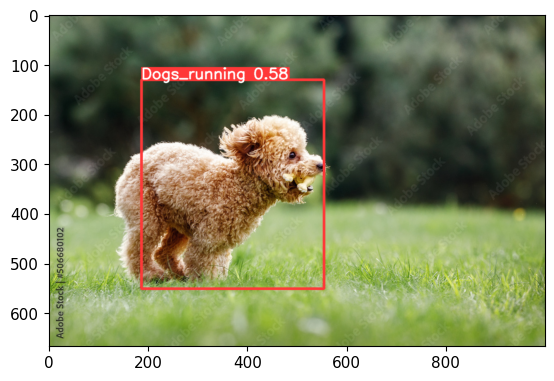

In [22]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()